# Social Networks

Social networks are likely the instantiation of a network that you are all familiar with. A decade ago, this concept was not nearly as prevalent and was entrancing and intoxicating when you would come across it (ask anyone who watched the first season of The Wire in 2002). With the advent of Facebook, Twitter, and LinkedIn (where the network is explicit, easily accessed, roughly shown to you) social networks appear *obvious*. However, there is much to be done to understand these networks so that we can understand them at a deeper level. 

Importantly, Social Networks differ from other networks, such as transportation networks, in that they exhibit two properties:

(i) nodes are very *close* to each other
(ii) the entire network is very *small* (it is generally quick to navigate from one side to the other)

As a demonstration of this, let's examine `soc-hamsterster.edges` which is a  social network from the hamsterster website (a virtual habitat for hamsters and gerbils! i.e. the owners who impersonate them). 



In [1]:
import networkx as nx
hamsterster = nx.read_edgelist('../Data/soc-hamsterster.edges', comments = '%')

In [2]:
hamsterster.number_of_nodes(), hamsterster.number_of_edges()

(2426, 16630)

In [3]:
nx.average_clustering(hamsterster)

0.5375333362074071

In [4]:
nx.average_shortest_path_length( list(nx.connected_component_subgraphs(hamsterster))[0] )

3.5889954977488743

These two properties are, on the face, at odds with each other. **Why?**

# Small worlds

This week we read D.J. Watts and S.H. Strogatz. (1998). Collective dynamics of 'small-world' networks. Nature 393, 440-442. What was the main insight of this paper? 

We can actually reproduce these findings use the instantiation of the Watts-Strogatz model in networkx

In [5]:
#Exercise


What's amazing, and frequently occurs in networks, is that the shortest path length effectively 'falls' off a cliff (reducing 10 fold) just with a minor change to $p$. We can see that it stabilizes quickly.

Clustering has a more gradual decline, since most edges are not actually changed. 

Given that social networks typically have a "high" (in respect to other types of networks) average clustering, we can see that there is a *sweet spot* of randomization from a highly structured graph where they are likely to exist. Surprisingly, it takes very little randomization from a fully structured graph to achieve this point. 

Why does this matter so much? Why were the detailing of these properties such a large "hit" in the scientific world?

# Contagion

Contagion is a process that is used to describe a rather large variety of phenomena, although its origin is in biology. Contagion is how we describe the spread of a disease from one organism to another (most frequently caring about human to human transmission). The typical model used is a SI model, where S stands for the Susceptible population of agents and I stands for the Infected population of agents. 

$\frac{dS}{dt}= -p s(t) I(t)$

where $S(t)$ is the number of susceptible people, $s(t)$ is the fraction of the population that is susceptible, $I(t)$ is the number of infected individuals at time $t$, and $b$ is the $p$ is the probability of an infected person infecting a susceptible one.

Without any type of recovery from the illness, this model will eventually convert all beginning susceptibles to infecteds. 

To gain intuition, write a function that implements the SI model on a network. Make sure the function can take an arbitrary $p$ value. The output should be the number of time steps that the model takes until all nodes are infected.

In [6]:
#Exercise


Now let's sweep again through the small world model rewiring probabilities, but capture how many timesteps it takes for the network to become fully infected. We will plot the average time for full infection against the rewiring probability.

* Run 10 networks per rewiring probability
* Seed only one infected node (at random)
* infection probability = 0.10

In [24]:
#Exercise


We effectively see the same behavior, i.e. immediately once the graph transitions to a small world network the time it takes for an infection to spread jumps off a cliff (almost 7 times quicker). 

This is both an explanation for how pandemics occur, as well as greatly intriguing researchers - how can we intervene effectively when our natural desire to connect is what creates so much of the risk?

This behavior is exacerbated when we consider a network with a power law distribution for the degree (as most on-line social networks have).

In [38]:
#Exercise


(0, 50)

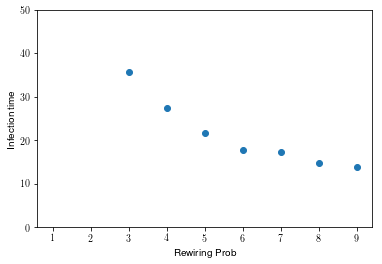

In [46]:
infection_times = {}

for m in range(1, 10):
    infection_times[m] = []
    for niter in range(10):
        tt = nx.barabasi_albert_graph(1000, m)
        infected = [random.choice(tt.nodes(data=False))]
        for tnode in temp.nodes():
            tt.node[tnode]['infected'] = False
        tt.node[infected[0]]['infected'] = True
        infection_times[m].append( SI(tt, 0.10, infected) )
        
xdata = list( sorted( infection_times.keys() ) )
plt.scatter(xdata, [np.mean(infection_times[x]) for x in xdata])
plt.xlabel('Rewiring Prob')
plt.ylabel('Infection time')

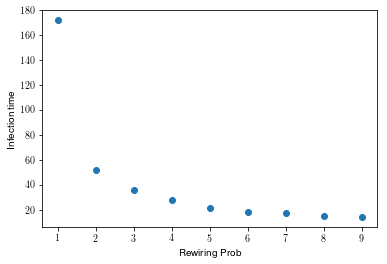

In [47]:
xdata = list( sorted( infection_times.keys() ) )
plt.scatter(xdata, [np.mean(infection_times[x]) for x in xdata])
plt.xlabel('Rewiring Prob')
plt.ylabel('Infection time')

Note that this picture is dramatically worse when we consider the typical structure that an online social network would have (fortunately, "hubs" in meatspace are few and far between.)

**TE** Who are the hubs in meatspace? 

The addition of "recovery" is relatively simple

$\frac{dr}{dt} = ki(t)$

where $k$ is the probability that someone that is infected transitions to recovered. You can then modify/decide if recovered people become susceptible again or not (as you are starting to guess, there are a giant number of variations on the SIR model). 

If the recovered population does not transition to susceptible, then the entire network will transition/stabilize as all susceptible/recovered at some time $t$. If recovered becomes susceptible again, then there will be a fraction of susceptibles that stabilizes at some time $t$.

# Generalizing contagion

Contagion on a network can be further generalized (and more amenable to non-pathogenic contagions, such as ideas or emotions) with the framework that is proposed in Dodds and Watts (2004), doi:10.1103/PhysRevLett.92.218701.

This model allows for the implementation of dosing (multiple exposures required to transition from susceptible to infected) and thresholds (agents can be more or less susceptible). 

# Discussion

N.A. Christakis and J.H. Fowler. (2007) The spread of obesity in a large social network over 32 years. *New England Journal of Medicine* **357**, 370-379.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

# Homophily

<img src='../images/homophily_blogs.png' alt='political blog network'></img>
Adamic and Glance. (2005) The political blogosphere. 

<img src='../images/homophily_school.png', alt='friendships at a school, nodes colored by race'></img>
Moody. (2001) Race, school integration, and friendship segregation in America. *AJS*. 

<img src='../images/homophily_school_table.png', alt='friendships at a school, table'>

What does this all mean? 

# Exogenous versus Endogenous

Contagion implicitly means that the cause of the illness/adoption/etc. is driven from exposure to another that has already contracted the illness/purchased the product/etc. When this isn't an illness, we would term this social influence and it would be an exogenous force. 

An individual choosing to purchase a product, based on its attributes and the fit of those attributes to the person's own sensibilities, would be a decision that is driven from within (endogenous). 

"In between" these two would be decision that are driven externally but not from social influence, i.e. marketing.

**The major difficulty with observed network adoption data is selection bias**. You **do not** know if someone would have adopted a product whether their friends adopted it or not with **only** the known adoption data and network structure.

# What can be done?

## Experimentation

The "simplest" answer is to run an experiment, perturbing the conditions for specific individuals and comparing their response to a control group.  

Aral and Walker. (2011) Creating social contagion through viral product design: randomized trial of peer influence in networks. *Management Science* 57(9):1623-1639.

Aral and Walker. (2012) Identifying influential and susceptible members of social networks. *Science* 3337(6092) 337-341. 

Kramer, Guillory, and Hancock. (2013) Experimental evidence of massive-scale emotional contagion through social networks. *PNAS*  8788–8790, doi: 10.1073/pnas.1320040111.

**TE** How far apart must your target nodes be in a network to control for spillover effects?

## Paired sampling

Using demographic variables and propensity score matching to identify matched pairs of users - then control/estimate the effects given the difference in number of neighbors that had adopted. 

With this approach we generally attempt to estimate the propensity to have been treated (exposed to influence from a neighbor), $p_{it}$ at time $t$ with logistic regression as

$p_{it} = P(T_{it} = 1|X_{it}) = \frac{1}{1 + exp[\alpha_{it} + \beta_{it}X_{it} + \epsilon_{it}]}$

where $X_{it}$ is the vector of demographic and behavioral covariates of node $i$. The **major** difficulty is that $X$ varies over time, so a match in week 1 of the adoption observation is not necessarily a match in week 10.

However, that does not mean that logistic regression would be the only method to generate matched pairs (just the most common for social scientists). There are a number of other clustering techniques that could be used instead (although the evaluation of its goodness of fit would differ dramatically). 

Aral, Muchnik, and Sundararajan. (2009) Distinguishing influence-based contagion from homophily driven diffusion in dynamic networks. 

### Exercise

We can detail an example of this proces with Python.

First, we will need to create two populations.

In [1]:
#Populations will have an Age [20-50], Education [0,1], and Married [0,1] attribute
#for simplicity's sake
import random
import pandas as pd


data = []
#Treatment condition yes or no
for condition in [0, 1]:
    #1000 people per population
    for i in range(1000):
        data.append([condition, random.randint(20, 50), random.choice([0, 1]), random.choice([0, 1])])
        
exampledf = pd.DataFrame(data, columns = ['Treated', 'Age', 'Education', 'Married'])

In [13]:
#We can fit LogisticRegression with scikit learn
from sklearn.linear_model import LogisticRegression

propensity = LogisticRegression()
propensity = propensity.fit(exampledf.iloc[:, 1:], exampledf.Treated)
#Returns the probability of being in the class
pscores = propensity.predict_proba(exampledf.iloc[:, 1:])
#Only want the second column
exampledf['Propensity'] = pscores[:,1]

exampledf.head()

[[ 0.49841392  0.50158608]
 [ 0.47626388  0.52373612]
 [ 0.50334012  0.49665988]
 [ 0.49102551  0.50897449]
 [ 0.52206907  0.47793093]]


In [14]:
#Or we can fit a Logistic Regression with statsmodels
import statsmodels.formula.api as smf 

fitLogit = smf.logit('Treated ~ Age + Education + Married', data = exampledf).fit()
#A Simple predict will get use the probabilities
pscores = fitLogit.predict(exampledf)
exampledf['Propensity'] = pscores

Optimization terminated successfully.
         Current function value: 0.692754
         Iterations 3


array([ 0.50159899,  0.52415835,  0.49658168,  0.50912405,  0.47779691])

And from this point, we would go and find the closest match from the control group for a member in the treated group (within some cutoff)

In [16]:
#Example


## Natural experiments

Use some exogenous shock to the system to quantitatively assess the influence of connections using a diff-in-diff regression. A typical example of applying this methodology is that you have an on-line social network and an avalanche happens in Denver, while it did not happen in Boston. This serves as the natural experiment, now you can see the difference between the two cities. However, what research questions really concern is the difference in behavior of two groups, say Group A and Group B. What we look at is the difference in behavior pre and post event for the 'treatment' and 'control' groups in Denver and Boston (thus, the difference in the difference). Based on a non-extensive literature review, a common shock used is...rain (not enough avalanches!).